# Fitting a Hologram

This notebook shows how to load a pre-recorded hologram of a colloidal sphere
into a Feature object and analyze it with Lorenz-Mie theory. The analysis yields
the radius of the sphere, the refractive index of the sphere, and the sphere's
three-dimensional location relative to the center of the imaging plane.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import cv2

from pylorenzmie.detection.Localizer import Localizer

from pylorenzmie.analysis import Frame

## Framework for Lorenz-Mie analysis
First, we instantiate a Frame() object. By default, Frame analyzes features with 
the standard Lorenz-Mie model for hologram formation. The model includes a description of the holographic microscope that records the images we wish to analyze. In this example, we specify that the instrument illuminates the sample with blue light at a vacuum wavelength of $\lambda$ = 0.447 μm and has a system magnification of 0.048 μm/pixel. For particles dispersed in water, the refractive index of the medium is $n_m$ = 1.340 at the imaging wavelength. These calibration constants may differ for different hardware implementations.
The commercial xSight instrument, for example, uses a system magnification of 0.120 μm/pixel.

In [2]:
configuration = dict(wavelength = 0.447,    # [um]
                     magnification = 0.048, # [um/pixel]
                     n_m = 1.34, 
                     distribution = 'radial',
                     percentpix = 0.2)

frame = Frame(**configuration)

## Read in holographic microscopy data
Next, we load the (normalized) hologram we wish to fit. In the present example, we use OpenCV to load a pre-recorded hologram that was saved as a PNG image. We convert the image to grayscale and normalize it by the mean value. This hologram was cropped from a larger image. Since we are not interested in locating the particle within the original image, we provide the model with a standard coordinate system using the coordinates() helper function. We finally can provide the normalized image data to the Feature() object for analysis.

In [3]:
def read_data(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.float)
    return img

def report(frame, results):
    fig, ax = plt.subplots(figsize=(8,8))
    ax.imshow(frame.image, cmap='gray')
    ax.scatter(results.x_p, results.y_p, c='r')
    for bbox in frame.bboxes:
        ax.add_patch(Rectangle(*bbox, fill=False, ec='r'))
    print(results)

In [4]:
img = read_data('tutorials/image0400.png')

## Holograms must be normalized for analysis

Frame() takes care of this automatically if the background property is set

In [5]:
frame.background = np.mean(img)

## Load the recorded image into the Frame

In [6]:
results = frame.analyze(img)

          x_p      dx_p         y_p      dy_p         z_p      dz_p       a_p  \
0  582.520597  0.049780  686.212864  0.054497  217.683324  0.412241  1.181574   
1  883.696928  0.057676  747.885733  0.051934  114.114999  0.276657  1.230422   

       da_p       n_p      dn_p  success  npix    redchi  
0  0.003392  1.392396  0.000400     True  9331  7.892529  
1  0.002736  1.394081  0.000385     True  5120  6.243936  


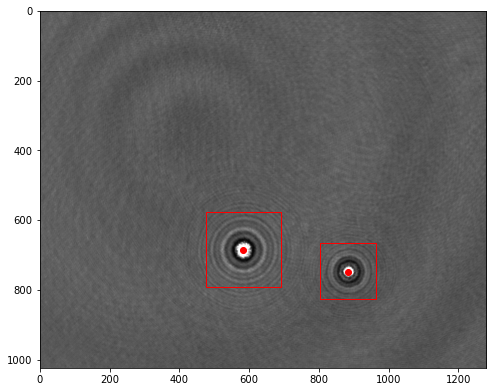

In [7]:
report(frame, results)

## Now that it's all set up, run it again

          x_p      dx_p         y_p      dy_p         z_p      dz_p       a_p  \
0  562.410121  0.057008  720.536975  0.053855  174.265940  0.252720  2.088771   
1  920.007266  0.055419  732.495357  0.052717  174.377648  0.238214  2.055083   

       da_p       n_p      dn_p  success   npix     redchi  
0  0.002309  1.370035  0.000114     True  28275  11.327511  
1  0.002187  1.369610  0.000108     True  30732   9.887590  


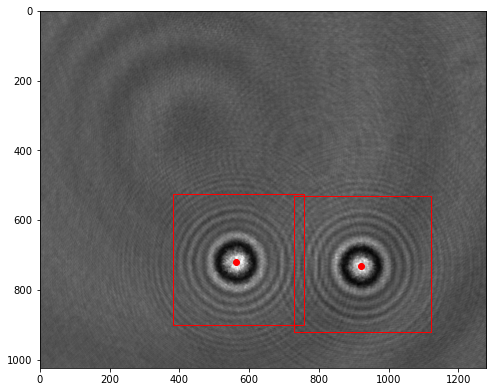

In [8]:
results = frame.analyze(read_data('tutorials/image0010.png'))
report(frame, results)